In [65]:
import pandas as pd

uri="https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [66]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price':'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns =a_renomear)
dados

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [67]:
trocar = {
    0:1,
    1:0
}

dados.nao_finalizado.map(trocar)

0       0
1       0
2       0
3       0
4       0
       ..
2152    1
2153    0
2154    1
2155    1
2156    0
Name: nao_finalizado, Length: 2157, dtype: int64

In [68]:
dados['finalizado'] = dados.nao_finalizado.map(trocar)

In [69]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


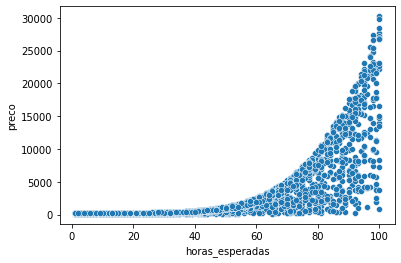

In [70]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas',y='preco',data=dados)

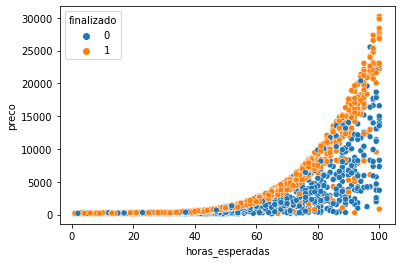

In [71]:
sns.scatterplot(x = 'horas_esperadas',y='preco',hue = "finalizado",data=dados)

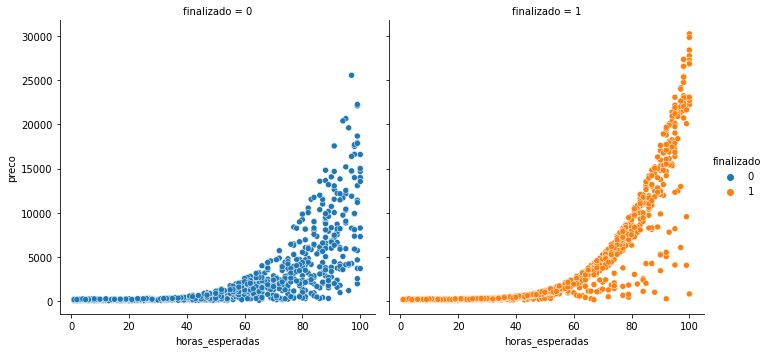

In [72]:
sns.relplot(x = 'horas_esperadas',y='preco',hue ='finalizado',col = "finalizado",data=dados)

Os não finalizados, parecem um pouco espalhados, mas os finalizados parecem seguir uma regra específica

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from  sklearn.metrics import accuracy_score

x = dados [['horas_esperadas','preco']]
y=dados['finalizado']

SEED = 5
np.random.seed(SEED)
treino_x,teste_x,treino_y,teste_y = train_test_split(x,y, random_state = SEED,test_size = 0.25,stratify = y)

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x,treino_y.values.ravel())

previsoes = modelo.predict(teste_x)

acuracia =accuracy_score(teste_y,previsoes)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
print("A acuracia foi: ",acuracia*100)
print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x),len(teste_x)))

A acuracia foi:  54.074074074074076
Treinaremos com 1617 elementos e testaremos com 540 elementos


In [75]:
import numpy as np

previsoes_de_base = np.ones(540)

In [76]:
acuracia =accuracy_score(teste_y,previsoes_de_base)
print("A acuracia do algoritmo de baseline foi: ",acuracia*100)

A acuracia do algoritmo de baseline foi:  52.59259259259259


Esse algoritmo não é melhor do que chutar sim para todos os casos!

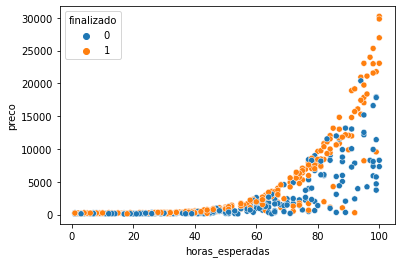

In [77]:
sns.scatterplot(x = 'horas_esperadas', y='preco',hue =teste_y,data=teste_x)

In [78]:
xmin = teste_x.horas_esperadas.min()
xmax = teste_x.horas_esperadas.max()

ymin = teste_x.preco.min()
ymax = teste_x.preco.max()

print(xmin, xmax, ymin, ymax)

1 100 100 30223


In [79]:
pixels = 100
eixox = np.arange(xmin,xmax,((xmax-xmin)/pixels))
eixoy = np.arange(ymin,ymax,((ymax-ymin)/pixels))

In [80]:
xx, yy = np.meshgrid(eixox,eixoy)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [81]:
Z = modelo.predict(pontos)
Z =Z.reshape(xx.shape)
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

Desenhando a Decision Boundary:

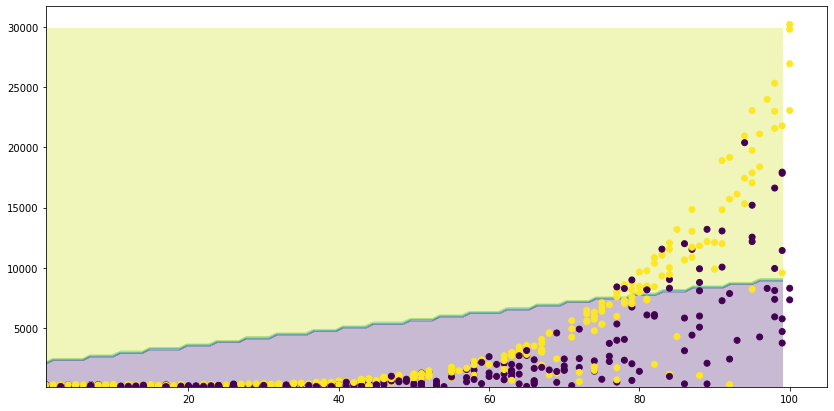

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize =(14,7))
plt.contourf(xx,yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y)

Temos que classificar, porém sem ser em linha resta, e sim para outro tipo de relacionamento

In [84]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi %.2f" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


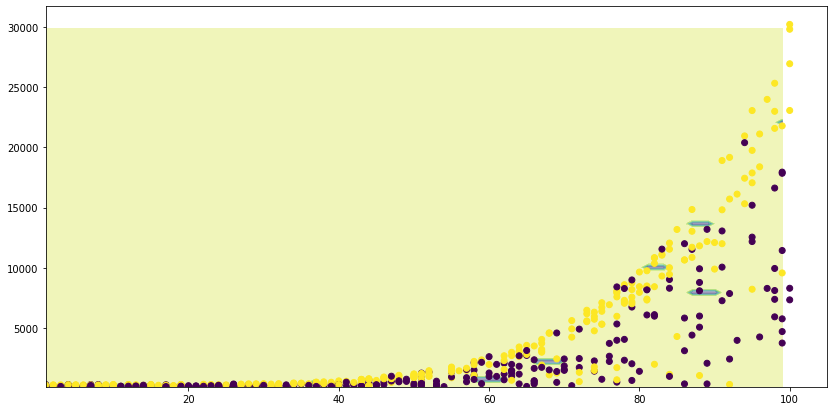

In [85]:
xmin = teste_x.horas_esperadas.min()
xmax = teste_x.horas_esperadas.max()

ymin = teste_x.preco.min()
ymax = teste_x.preco.max()

pixels = 100
eixox = np.arange(xmin,xmax,((xmax-xmin)/pixels))
eixoy = np.arange(ymin,ymax,((ymax-ymin)/pixels))

xx, yy = np.meshgrid(eixox,eixoy)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos
Z = modelo.predict(pontos)
Z =Z.reshape(xx.shape)
Z

import matplotlib.pyplot as plt
plt.figure(figsize =(14,7))
plt.contourf(xx,yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y)

Esse tipo de algoritmo é muito sensível a escala, escalas distintas vão causar um desbalanço no algoritmo.

In [90]:
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))


scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi %.2f" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85


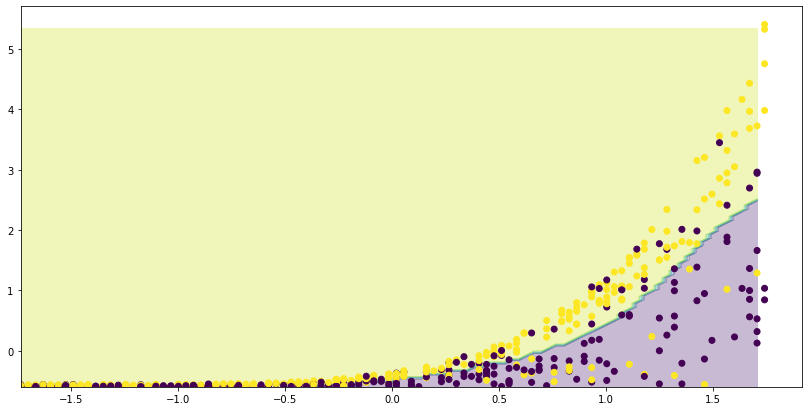

In [93]:
data_x = teste_x[:,0]

data_y = teste_x[:,1]

xmin=data_x.min()
xmax = data_x.max(0)
ymin = data_y.min()
ymax = data_y.max()

pixels = 100
eixox = np.arange(xmin,xmax,((xmax-xmin)/pixels))
eixoy = np.arange(ymin,ymax,((ymax-ymin)/pixels))

xx, yy = np.meshgrid(eixox,eixoy)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos
Z = modelo.predict(pontos)
Z =Z.reshape(xx.shape)
Z

import matplotlib.pyplot as plt
plt.figure(figsize =(14,7))
plt.contourf(xx,yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c= teste_y)

Esse SVC ficou bem melhor que o Linear, já que não possui restrições 